# Threshold Image Segmentation Method

The aim of this method is to divide the image into a binary image (=into 2 classes (background & object) ), this process is also known as binarization. A high contrast between background & object is needed to perform well. Often used before another algorythm (e.g. contour detection) is applied, which needs a binary image as input.

The cv2.THRESH_BINARY method creates a binary image where the pixels with a value greater than or equal to the threshold are set to a maximum value (in this case, 255 = white) and the pixels with a value less than the threshold are set to a minimum value (in this case, 0=black).

All 5 types of the thresholding methods are used in the code are from the pip cv2:
- THRESH_BINARY             pixelvalue >= threshold: maxval (255=white) ; else 0 (=black)
- THRESH_BINARY_INV         pixelvalue >= threshold: 0; else maxval
- THRESH_TRUNC              pixelvalue >= threshold: threshold; else pixelvalue
- THRESH_TOZERO             pixelvalue >= threshold: pixelvalue; else 0
- THRESH_TOZERO_INV         pixelvalue >= threshold: 0; else pixelvalue

cv2.threshold(src, thresh, maxval, type)
src is the source image which should be thresholded, thresh is the threshold value, maxval is the value to be given if pixel value is more than (sometimes less than) the threshold value, and type is the type of thresholding which is used.

In [ ]:
#!pip install opencv-python

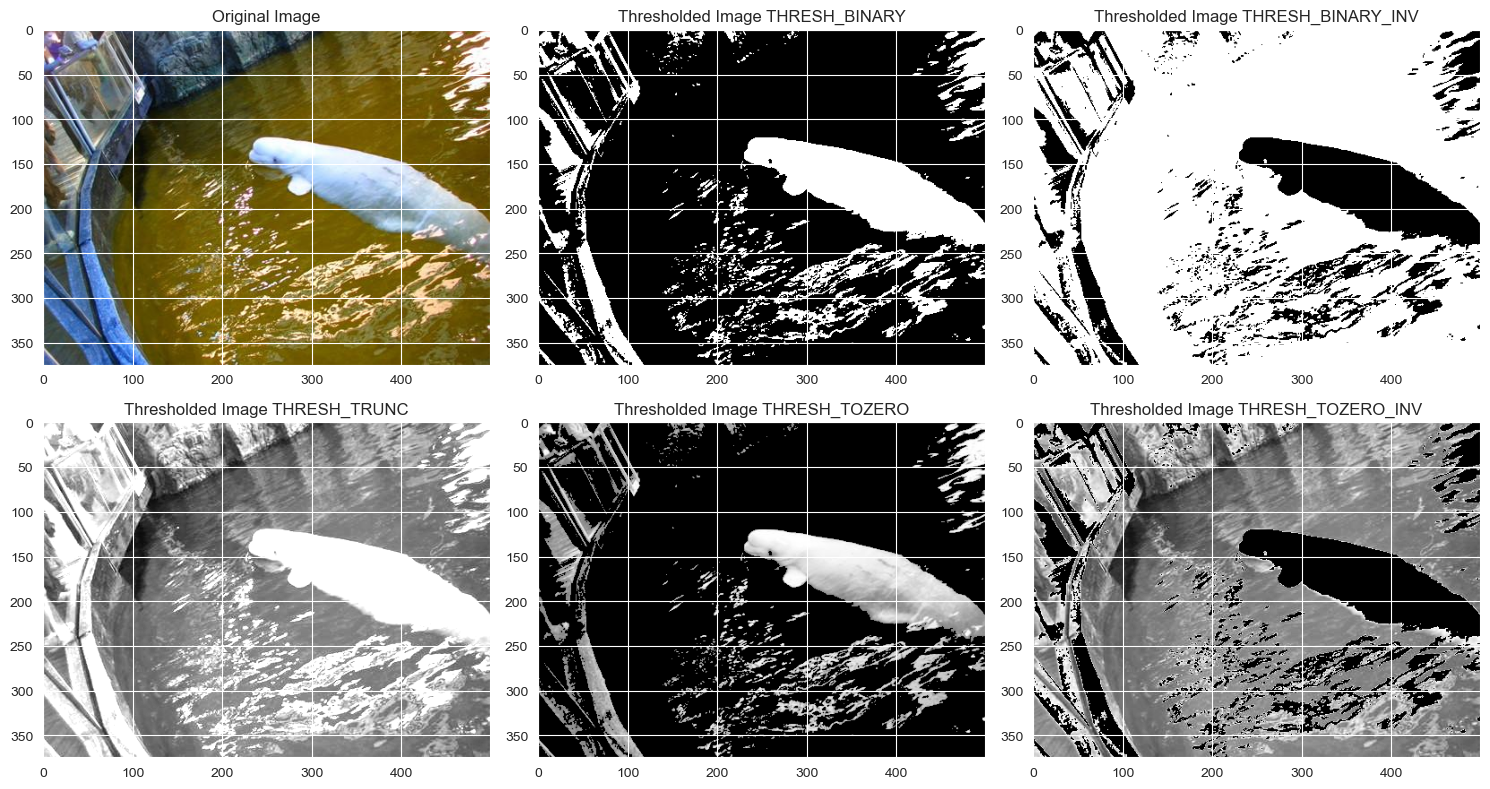

In [1]:
input_img_path = "images/ADE_train_00001493.jpg"

import cv2
from matplotlib import pyplot as plt

# Load the input image
img = cv2.imread(input_img_path)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a threshold to the image to create a binary image
threshold_b, thresholded_img_b = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)       # pixelvalue > threshold: maxval; else 0 #128=threshold; 255=white
threshold_bi, thresholded_img_bi = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV) # pixelvalue > threshold: 0; else maxval
threshold_t, thresholded_img_t = cv2.threshold(gray, 128, 255,cv2.THRESH_TRUNC)         # pixelvalue > threshold: threshold; else pixelvalue
threshold_0, thresholded_img_0 = cv2.threshold(gray, 128, 255,cv2.THRESH_TOZERO)        # pixelvalue > threshold: pixelvalue; else 0
threshold_0i, thresholded_img_0i = cv2.threshold(gray, 128, 255,cv2.THRESH_TOZERO_INV)  # pixelvalue > threshold: 0; else pixelvalue

# Save the ground truth image to a file
#cv2.imwrite("images/thresholded_img.png", thresholded_img)

# Display the original and all 5 types of thresholded images
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.subplot(2, 3, 2)
plt.imshow(thresholded_img_b, cmap="gray")
plt.title("Thresholded Image THRESH_BINARY")
plt.subplot(2, 3, 3)
plt.imshow(thresholded_img_bi, cmap="gray")
plt.title("Thresholded Image THRESH_BINARY_INV")
plt.subplot(2, 3, 4)
plt.imshow(thresholded_img_t, cmap="gray")
plt.title("Thresholded Image THRESH_TRUNC")
plt.subplot(2, 3, 5)
plt.imshow(thresholded_img_0, cmap="gray")
plt.title("Thresholded Image THRESH_TOZERO")
plt.subplot(2, 3, 6)
plt.imshow(thresholded_img_0i, cmap="gray")
plt.title("Thresholded Image THRESH_TOZERO_INV")
plt.tight_layout()
plt.show()

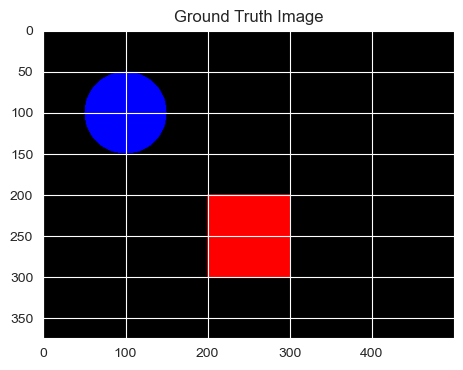

In [2]:
# generate ground truth image
import cv2
import numpy as np
# Load the input image
img_for_size = cv2.imread("images/ADE_train_00001493.jpg")

img = cv2.imread("images/ground_truth.png")

# Create an empty image with the same dimensions as the input image
ground_truth_img = np.zeros_like(img_for_size)
ground_truth_img.shape
# Draw a red circle on the ground truth image to represent a foreground object
cv2.circle(ground_truth_img, (100, 100), 50, (0, 0, 255), -1)

# Draw a blue rectangle on the ground truth image to represent a background object
cv2.rectangle(ground_truth_img, (200, 200), (300, 300), (255, 0, 0), -1)

# Save the ground truth image to a file
cv2.imwrite("images/ground_truth.png", ground_truth_img)

# Display the input image and the ground truth image
plt.figure(figsize=(12, 4))
plt.imshow(ground_truth_img, cmap="gray")
plt.title("Ground Truth Image")
plt.show()

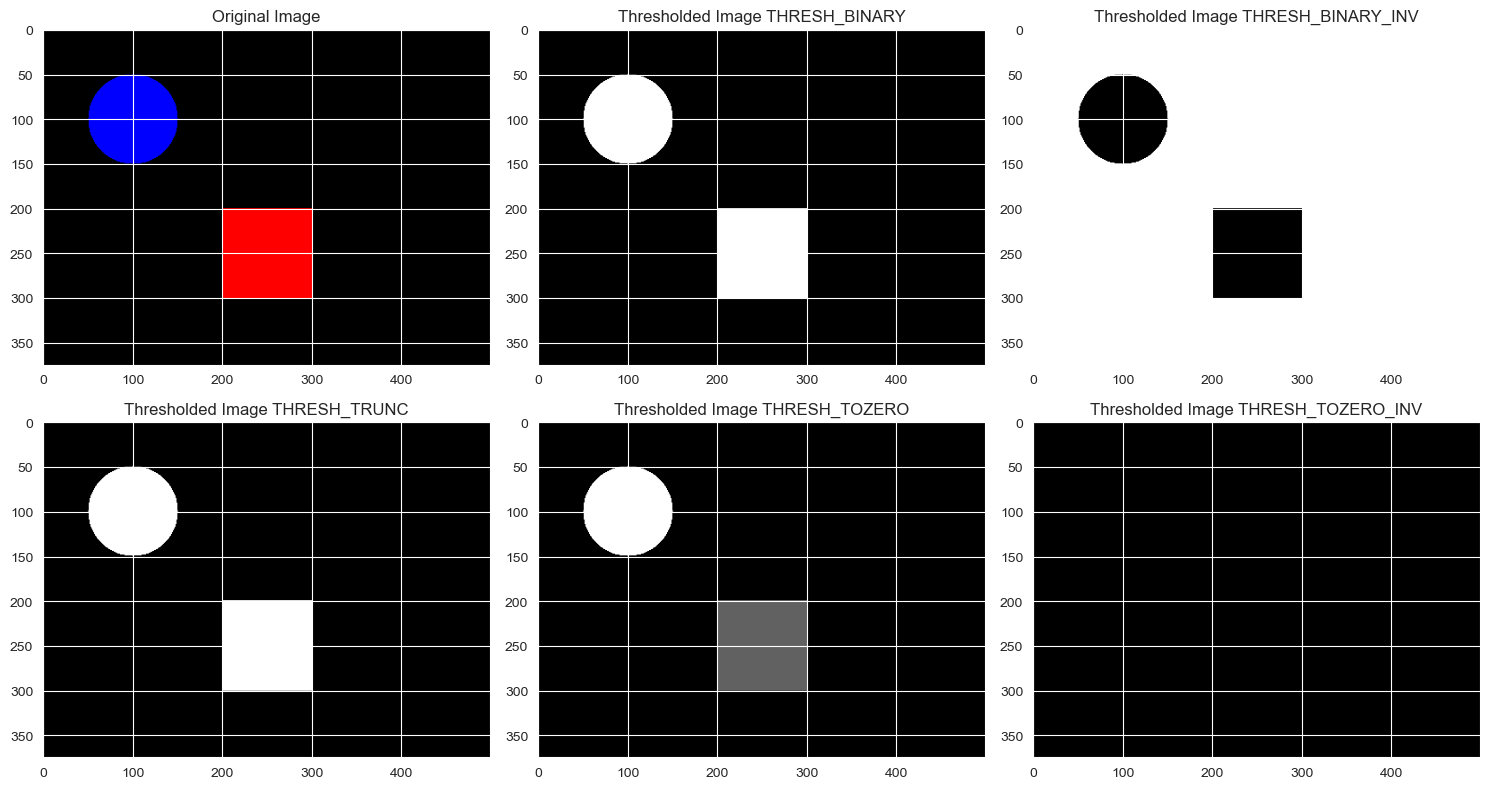

In [11]:
# perform threshold-based segmentation
import cv2

# Load the input image
img = ground_truth_img
img_o = cv2.imread("images/ground_truth.png")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Define the threshold value
threshold = 1

# Apply a threshold to the image to create a binary image
thresholded_img_b = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)[1]
thresholded_img_bi = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY_INV)[1]
thresholded_img_t = cv2.threshold(gray, threshold, 255, cv2.THRESH_TRUNC)[1]
thresholded_img_0 = cv2.threshold(gray, threshold, 255, cv2.THRESH_TOZERO)[1]
thresholded_img_0i = cv2.threshold(gray, threshold, 255, cv2.THRESH_TOZERO_INV)[1]

# Display the original and thresholded images
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
plt.imshow(img_o)
plt.title("Original Image")
plt.subplot(2, 3, 2)
plt.imshow(thresholded_img_b, cmap="gray")
plt.title("Thresholded Image THRESH_BINARY")
plt.subplot(2, 3, 3)
plt.imshow(thresholded_img_bi, cmap="gray")
plt.title("Thresholded Image THRESH_BINARY_INV")
plt.subplot(2, 3, 4)
plt.imshow(thresholded_img_t, cmap="gray")
plt.title("Thresholded Image THRESH_TRUNC")
plt.subplot(2, 3, 5)
plt.imshow(thresholded_img_0, cmap="gray")
plt.title("Thresholded Image THRESH_TOZERO")
plt.subplot(2, 3, 6)
plt.imshow(thresholded_img_0i, cmap="gray")
plt.title("Thresholded Image THRESH_TOZERO_INV")
plt.tight_layout()
plt.show()

# Performance

- accuracy:             how many % of the pixels where correctly classified

- precision (class):    how trustable is the result of a class that a pixel belongs to that class
- recall (class):       how well a class is detected
- F1 score (class):     harmonic mean of precision & recall

The performance is only applied to the THRESHOLD_BINARY type.

In [27]:
# True Positives (TP) = Pixels correctly classified as foreground/object
TP = np.sum(np.logical_and(thresholded_img_b == 255, ground_truth_img[:,:,0] == 255))

# True Negatives (TN) = Pixels correctly classified as background
TN = np.sum(np.logical_and(thresholded_img_b == 0, ground_truth_img[:,:,0] == 0))

# False Positives (FP) = Pixels incorrectly classified as foreground/object
FP = np.sum(np.logical_and(thresholded_img_b == 255, ground_truth_img[:,:,0] == 0))

# False Negatives (FN) = Pixels incorrectly classified as background
FN = np.sum(np.logical_and(thresholded_img_b == 0, ground_truth_img[:,:,0] == 255))

# Accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Precision = TP / (TP + FP)
precision_obj = TP / (TP + FP)
precision_BG = TN / (TN + FN)

# Recall = TP / (TP + FN)
recall_obj = TP / (TP + FN)
recall_BG = TN / (TN + FP)

# F1 Score = 2 * (precision * recall) / (precision + recall)
f1_score_obj = 2 * (precision_obj * recall_obj) / (precision_obj + recall_obj)
f1_score_BG = 2 * (precision_BG * recall_BG) / (precision_BG + recall_BG)

# Print the results
print("Accuracy: ", accuracy)
print("\nFOREGROUND / OBJECT class")
print("Precision: ", precision_obj)
print("Recall: ", recall_obj)
print("F1 Score: ", f1_score_obj)
print("\nBACKGROUND class")
print("Precision: ", precision_BG)
print("Recall: ", recall_BG)
print("F1 Score: ", f1_score_BG)

Accuracy:  0.05440533333333333

FOREGROUND / OBJECT class
Precision:  0.05440533333333333
Recall:  1.0
F1 Score:  0.1031962407878564

BACKGROUND class
Precision:  nan
Recall:  0.0
F1 Score:  nan


C:\Users\andre\AppData\Local\Temp\ipykernel_10264\2452326695.py:18: RuntimeWarning: invalid value encountered in long_scalars
  precision_BG = TN / (TN + FN)
